
<center> 
    <h1>Data Science Salary Analysis</h1> 
    <img  src = "https://patimes.org/wp-content/uploads/2020/03/data_monetization_column_Mar20.jpg" width = 800 >


# Import Libraries

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

print("✅ Librires imported Successfully")

✅ Librires imported Successfully


# Read Dataset

In [420]:
df = pd.read_csv("salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Admin & Data Analyst,50000,USD,50000,DE,0,DE,M
1,2024,SE,FT,Data Management Specialist,200400,USD,200400,US,0,US,M
2,2024,SE,FT,Data Management Specialist,116500,USD,116500,US,0,US,M
3,2024,SE,FT,Data Scientist,188500,USD,188500,US,0,US,M
4,2024,SE,FT,Data Scientist,165100,USD,165100,US,0,US,M


## **Dataset description**
The dataset contains 11 columns with the following characteristics:

1. **work_year**: The year the salary was paid.

2. **experience_level**: The experience level in the job during the year with the following possible values:
  - EN: Entry-level / Junior
  - MI: Mid-level / Intermediate
  - SE: Senior-level / Expert
  - EX: Executive-level / Director

3. **employment_type**: The type of employement for the role:
  - PT: Part-time
  - FT: Full-time
  - CT: Contract
  - FL: Freelance

4. **job_title**: The role worked in during the year.

5. **salary**: The total gross salary amount paid.

6. **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.

7. **salary_in_usd**: The salary in USD (FX rate divided by avg. USD rate of respective year via data from fxdata.foorilla.com).

8. **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.

9. **remote_ratio**: The overall amount of work done remotely, possible values are as follows:
  - 0: No remote work (less than 20%)
  - 50: Partially remote/hybrid
  - 100: Fully remote (more than 80%)

10. **company_location**: The country of the employer's main office or contracting branch as an ISO 3166 country code.

11. **company_size**: The average number of people that worked for the company during the year:
  -S: less than 50 employees (small)
  -M: 50 to 250 employees (medium)
  -L: more than 250 employees (large)

In [421]:
# shape
# info
# describe
# missing values

In [422]:
# shape of dataframe
df.shape

(11570, 11)

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11570 entries, 0 to 11569
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           11570 non-null  int64 
 1   experience_level    11570 non-null  object
 2   employment_type     11570 non-null  object
 3   job_title           11570 non-null  object
 4   salary              11570 non-null  int64 
 5   salary_currency     11570 non-null  object
 6   salary_in_usd       11570 non-null  int64 
 7   employee_residence  11570 non-null  object
 8   remote_ratio        11570 non-null  int64 
 9   company_location    11570 non-null  object
 10  company_size        11570 non-null  object
dtypes: int64(4), object(7)
memory usage: 994.4+ KB


In [424]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,11570.000000,1.157000e+04,11570.000000,11570.000000
mean,2022.896283,1.690995e+05,149710.030337,35.233362
std,0.601489,4.007793e+05,66971.253553,47.251010
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.046500e+05,104000.000000,0.000000
50%,2023.000000,1.422500e+05,142000.000000,0.000000
75%,2023.000000,1.886000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,750000.000000,100.000000


In [425]:
df.describe(include = "object")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,11570,11570,11570,11570,11570,11570,11570
unique,4,4,134,22,87,76,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,7940,11522,2594,10617,10015,10064,10532


# Checking conssistency of data

In [426]:
df["job_title"].dtype == "object"

True

In [427]:
df["salary"].dtype == "object"

False

In [428]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [429]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
cat_cols

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [430]:
df["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [431]:
df["employment_type"].nunique()

4

In [432]:
for col in cat_cols:
 unique_number = df[col].nunique() 
 unique_elements = df[col].unique() 
 print(col)
 print("Number of unique Elements:", unique_number)
 print("Number of unique Elements:", unique_elements)
 print("--------------------------------------------")
 print()

experience_level
Number of unique Elements: 4
Number of unique Elements: ['EN' 'SE' 'MI' 'EX']
--------------------------------------------

employment_type
Number of unique Elements: 4
Number of unique Elements: ['FT' 'CT' 'PT' 'FL']
--------------------------------------------

job_title
Number of unique Elements: 134
Number of unique Elements: ['Admin & Data Analyst' 'Data Management Specialist' 'Data Scientist'
 'Data Product Manager' 'Data Engineer' 'Data Analyst' 'Data Architect'
 'Machine Learning Engineer' 'Data Science' 'ML Engineer' 'Data Manager'
 'Research Engineer' 'Data Analytics Consultant' 'Research Scientist'
 'Applied Scientist' 'Analytics Engineer' 'Business Intelligence Engineer'
 'Data Science Engineer' 'AI Engineer' 'Business Intelligence Manager'
 'Data Specialist' 'Machine Learning Scientist'
 'Data Integration Specialist' 'Research Analyst'
 'Data Analytics Specialist' 'Business Intelligence Analyst'
 'Lead Data Analyst' 'Data Operations Analyst' 'Data Manageme

 # Obervation

# Data Cleaning

## make a new column named "job_title_cleaned" and merge overlapping job title with each other

In [433]:
titles = df["job_title"].unique()
len(titles)


134

In [434]:
analyst_keywords = ["analy" , "bi"]

In [435]:
analyst_keywords = ["analy", "bi"]
analyst_job_titles = []
for keyword in analyst_keywords:
  for title in titles:
    if keyword in title.lower():
      analyst_job_titles.append(title)

len(analyst_job_titles)

37

In [436]:
# remove non analyist job titles from list
rem_title_list_analyst = ['Analytics Engineering Manager','Big Data Engineer',
 'BI Data Engineer',
 'Big Data Architect']


In [437]:
analyst_job_titles = list(set(analyst_job_titles) - set(rem_title_list_analyst))
len(analyst_job_titles)

31

In [438]:
#remove data analyist job titles from title list
titles = list(set(titles) - set(analyst_job_titles))
len(titles)


103

In [439]:
#filter data dcintist job title
scientist_keywords = ["scien"]
scientist_job_titles = []
for keyword in scientist_keywords:
  for title in titles:
    if keyword in title.lower():
      scientist_job_titles.append(title)

len(scientist_job_titles)

24

In [440]:
#remove data scintist job title form title list
titles = list(set(titles) - set(scientist_job_titles))
len(titles)

79

In [441]:
#filter data engineer job title
engineer_keywords = ["engin"]
engineer_job_titles = []
for keyword in engineer_keywords:
  for title in titles:
    if keyword in title.lower():
      engineer_job_titles.append(title)
len(engineer_job_titles)

39

In [442]:
engineer_job_titles

['Data Engineer',
 'Machine Learning Operations Engineer',
 'Computer Vision Software Engineer',
 'MLOps Engineer',
 'Staff Machine Learning Engineer',
 'AI Research Engineer',
 'Data Visualization Engineer',
 'Software Data Engineer',
 'Lead Machine Learning Engineer',
 'Machine Learning Research Engineer',
 'Data Integration Engineer',
 'Applied Machine Learning Engineer',
 'Cloud Data Engineer',
 'NLP Engineer',
 'ML Engineer',
 'Cloud Database Engineer',
 'Computer Vision Engineer',
 'Principal Data Engineer',
 'Machine Learning Engineer',
 'Data Infrastructure Engineer',
 'ETL Engineer',
 'Data Quality Engineer',
 'Consultant Data Engineer',
 'Marketing Data Engineer',
 'Deep Learning Engineer',
 'Lead Data Engineer',
 'Prompt Engineer',
 'Machine Learning Software Engineer',
 'Analytics Engineering Manager',
 'Research Engineer',
 'Big Data Engineer',
 'Data Operations Engineer',
 'Business Intelligence Engineer',
 'AI Engineer',
 'Azure Data Engineer',
 'Data DevOps Engineer',
 

In [443]:
#removing non data engineering job titles
rem_title_list_engineer = ['Computer Vision Software Engineer','Deep Learning Engineer','Computer Vision Engineer',
 'Prompt Engineer','NLP Engineer']

engineer_job_titles = list(set(engineer_job_titles) - set(rem_title_list_engineer))
len(engineer_job_titles)

34

In [444]:
#removing data engineering job 
titles = list(set(titles) - set(engineer_job_titles))
len(titles)

45

In [445]:
ds = ['AI Developer','Computer Vision Engineer','Machine Learning Specialist',
      'Machine Learning Researcher','Deep Learning Researcher',
      'Head of Machine Learning','Machine Learning Manager','Machine Learning Developer','NLP Engineer',
      'Machine Learning Modeler','Computer Vision Software Engineer', 'Deep Learning Engineer', 'AI Programmer']

da = ['Business Intelligence Specialist', 'Data Visualization Specialist',
      'Business Intelligence Manager','Business Intelligence Developer']

de = [ 'Data Operations Associate','Data Integration Specialist','Data Modeller',
      'Data Operations Specialist','Big Data Architect','Principal Data Architect',
      'AWS Data Architect','Data Operations Manager','Data Modeler','ETL Developer','AI Architect',
      'Cloud Data Architect','Data Architect']

In [446]:
analyst_job_titles.extend(da)
engineer_job_titles.extend(de)
scientist_job_titles.extend(ds)

In [447]:
len(analyst_job_titles),len(scientist_job_titles),len(engineer_job_titles)

(35, 37, 47)

In [448]:
set(titles) - set(analyst_job_titles) - set(scientist_job_titles) - set(engineer_job_titles)

{'AI Product Manager',
 'Autonomous Vehicle Technician',
 'Data Developer',
 'Data Lead',
 'Data Management Specialist',
 'Data Manager',
 'Data Product Manager',
 'Data Product Owner',
 'Data Quality Manager',
 'Data Specialist',
 'Data Strategist',
 'Data Strategy Manager',
 'Head of Data',
 'Manager Data Management',
 'Prompt Engineer'}

In [449]:
df["clean_job_titles"] = np.where(df["job_title"].isin(analyst_job_titles), "Data Analyst",
                         np.where(df["job_title"].isin(scientist_job_titles), "Data Scientist",
                         np.where(df["job_title"].isin(engineer_job_titles), "Data Engineer", df["job_title"])))

In [450]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,clean_job_titles
0,2023,EN,FT,Admin & Data Analyst,50000,USD,50000,DE,0,DE,M,Data Analyst
1,2024,SE,FT,Data Management Specialist,200400,USD,200400,US,0,US,M,Data Management Specialist
2,2024,SE,FT,Data Management Specialist,116500,USD,116500,US,0,US,M,Data Management Specialist
3,2024,SE,FT,Data Scientist,188500,USD,188500,US,0,US,M,Data Scientist
4,2024,SE,FT,Data Scientist,165100,USD,165100,US,0,US,M,Data Scientist


In [451]:
df.to_csv("clean_Salary.csv")

# DATA ANALYSIS

In [452]:
df = pd.read_csv("clean_Salary.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,clean_job_titles
0,0,2023,EN,FT,Admin & Data Analyst,50000,USD,50000,DE,0,DE,M,Data Analyst
1,1,2024,SE,FT,Data Management Specialist,200400,USD,200400,US,0,US,M,Data Management Specialist
2,2,2024,SE,FT,Data Management Specialist,116500,USD,116500,US,0,US,M,Data Management Specialist
3,3,2024,SE,FT,Data Scientist,188500,USD,188500,US,0,US,M,Data Scientist
4,4,2024,SE,FT,Data Scientist,165100,USD,165100,US,0,US,M,Data Scientist


In [453]:
df.drop(columns = ["Unnamed: 0" , "job_title"],inplace = True)

In [454]:
df.head()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,clean_job_titles
0,2023,EN,FT,50000,USD,50000,DE,0,DE,M,Data Analyst
1,2024,SE,FT,200400,USD,200400,US,0,US,M,Data Management Specialist
2,2024,SE,FT,116500,USD,116500,US,0,US,M,Data Management Specialist
3,2024,SE,FT,188500,USD,188500,US,0,US,M,Data Scientist
4,2024,SE,FT,165100,USD,165100,US,0,US,M,Data Scientist


In [455]:
df.rename(columns = {"clean_job_titles":"job_title"},inplace = True)

In [456]:
df

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title
0,2023,EN,FT,50000,USD,50000,DE,0,DE,M,Data Analyst
1,2024,SE,FT,200400,USD,200400,US,0,US,M,Data Management Specialist
2,2024,SE,FT,116500,USD,116500,US,0,US,M,Data Management Specialist
3,2024,SE,FT,188500,USD,188500,US,0,US,M,Data Scientist
4,2024,SE,FT,165100,USD,165100,US,0,US,M,Data Scientist
...,...,...,...,...,...,...,...,...,...,...,...
11565,2020,SE,FT,412000,USD,412000,US,100,US,L,Data Scientist
11566,2021,MI,FT,151000,USD,151000,US,100,US,L,Data Scientist
11567,2020,EN,FT,105000,USD,105000,US,100,US,S,Data Scientist
11568,2020,EN,CT,100000,USD,100000,US,100,US,L,Data Analyst


## Question 1.  entry level average salary gloabl vs india for analyst, scientist and engineer

In [457]:
df["is_india"] = np.where(df["company_location"] == "IN","IN","OTH")

In [458]:
title_list = ["Data Analyst", "Data Scientist" , "Data Engineer"]
df_1 = df[df["job_title"].isin(title_list)]
df_1.head()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title,is_india
0,2023,EN,FT,50000,USD,50000,DE,0,DE,M,Data Analyst,OTH
3,2024,SE,FT,188500,USD,188500,US,0,US,M,Data Scientist,OTH
4,2024,SE,FT,165100,USD,165100,US,0,US,M,Data Scientist,OTH
7,2024,MI,FT,128600,USD,128600,US,0,US,M,Data Engineer,OTH
8,2024,MI,FT,100000,USD,100000,US,0,US,M,Data Engineer,OTH


In [459]:
mask = df_1["experience_level"] == "EN"
temp_df = df_1[mask].groupby(by=["is_india","job_title"])["salary_in_usd"].mean().reset_index()
temp_df

,is_india,job_title,salary_in_usd
0,IN,Data Analyst,22944.333333
1,IN,Data Engineer,20553.000000
2,IN,Data Scientist,31810.800000
3,OTH,Data Analyst,78640.014620
4,OTH,Data Engineer,98698.232432
5,OTH,Data Scientist,98328.094241


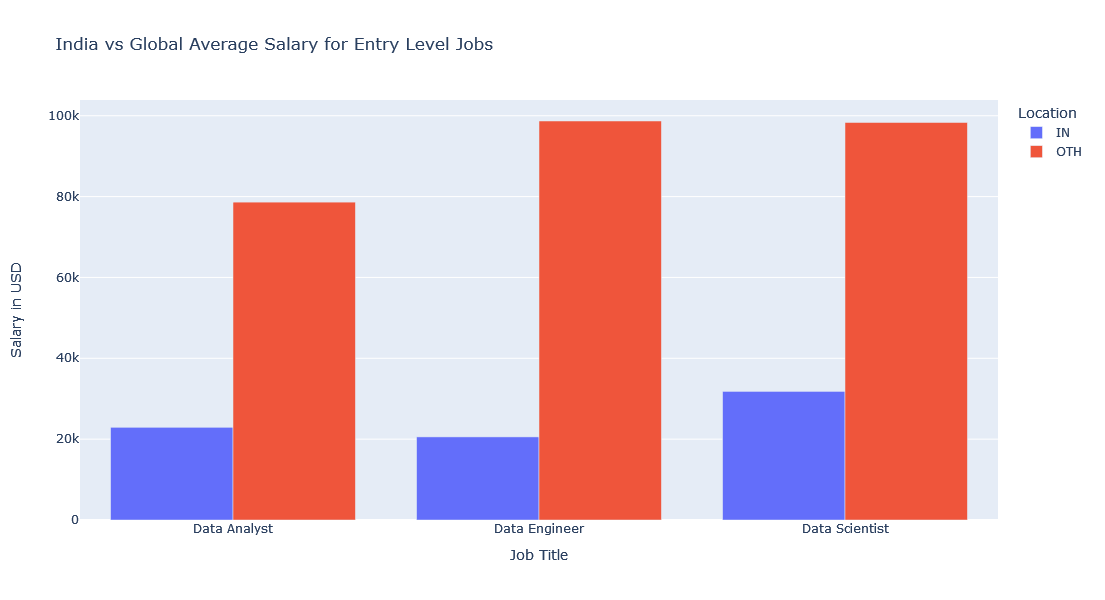

In [460]:
import plotly.express as px

# Assuming temp_df contains your data
fig = px.bar(temp_df, x="job_title", y="salary_in_usd", color="is_india",
             labels={"salary_in_usd": "Salary in USD", "is_india": "Location"},
             title="India vs Global Average Salary for Entry Level Jobs",
             barmode='group')

fig.update_layout(xaxis_title="Job Title", yaxis_title="Salary in USD", height=600)
fig.show()


## Question 2.year wise comparision of average salary of data scientist

In [461]:
temp_df = df_1[df_1["job_title"] == "Data Scientist"]
temp_df = temp_df.groupby(by = "work_year")["salary_in_usd"].mean().reset_index()
temp_df

,work_year,salary_in_usd
0,2020,123309.771429
1,2021,99787.567010
2,2022,139186.168478
3,2023,169261.675176
4,2024,162042.376771


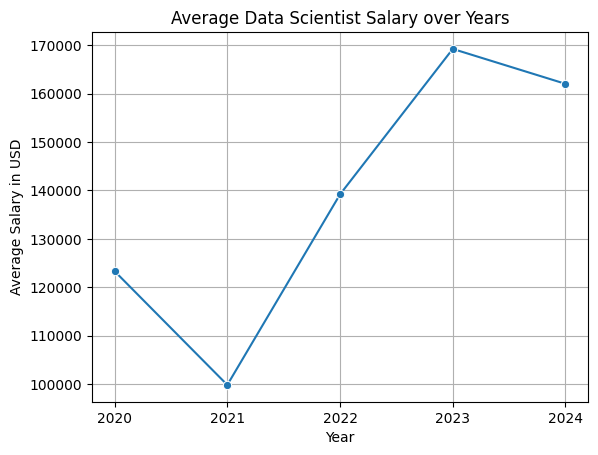

In [462]:
sns.lineplot(data = temp_df, x= "work_year", y = "salary_in_usd", marker = "o")
plt.grid(True)
plt.xticks(temp_df["work_year"])
plt.title("Average Data Scientist Salary over Years")
plt.xlabel("Year")
plt.ylabel("Average Salary in USD")
plt.show()

In [463]:
# temp_df = df_1[df_1["job_title"] == "Data Scientist"]
temp_df = df_1.groupby(by = ["work_year", "job_title"])["salary_in_usd"].mean().reset_index()
temp_df

,work_year,job_title,salary_in_usd
0,2020,Data Analyst,68014.666667
1,2020,Data Engineer,93310.120000
2,2020,Data Scientist,123309.771429
3,2021,Data Analyst,85159.108108
4,2021,Data Engineer,103472.620253
5,2021,Data Scientist,99787.567010
6,2022,Data Analyst,112552.908356
7,2022,Data Engineer,142876.340909
8,2022,Data Scientist,139186.168478
9,2023,Data Analyst,115237.954203


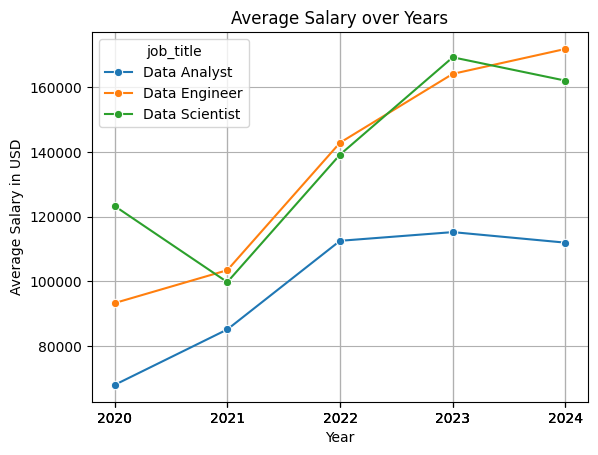

In [464]:
sns.lineplot(data = temp_df, x= "work_year", y = "salary_in_usd", marker = "o", hue = "job_title")
plt.grid(True)
plt.xticks(temp_df["work_year"])
plt.title("Average Salary over Years")
plt.xlabel("Year")
plt.ylabel("Average Salary in USD")
plt.show()

## Question 3.comparision bw average salary of data engineer and data scientist

In [465]:
temp = df[(df["job_title"] == "Data Scientist") | (df["job_title"] == "Data Engineer")]
temp

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title,is_india
3,2024,SE,FT,188500,USD,188500,US,0,US,M,Data Scientist,OTH
4,2024,SE,FT,165100,USD,165100,US,0,US,M,Data Scientist,OTH
7,2024,MI,FT,128600,USD,128600,US,0,US,M,Data Engineer,OTH
8,2024,MI,FT,100000,USD,100000,US,0,US,M,Data Engineer,OTH
11,2024,SE,FT,210000,USD,210000,US,0,US,M,Data Engineer,OTH
...,...,...,...,...,...,...,...,...,...,...,...,...
11563,2021,MI,FT,24000,EUR,28369,MT,50,MT,L,Data Engineer,OTH
11565,2020,SE,FT,412000,USD,412000,US,100,US,L,Data Scientist,OTH
11566,2021,MI,FT,151000,USD,151000,US,100,US,L,Data Scientist,OTH
11567,2020,EN,FT,105000,USD,105000,US,100,US,S,Data Scientist,OTH


In [466]:
temp_df = temp.groupby("job_title")["salary_in_usd"].mean().reset_index()
temp_df

,job_title,salary_in_usd
0,Data Engineer,160552.058800
1,Data Scientist,161909.429947


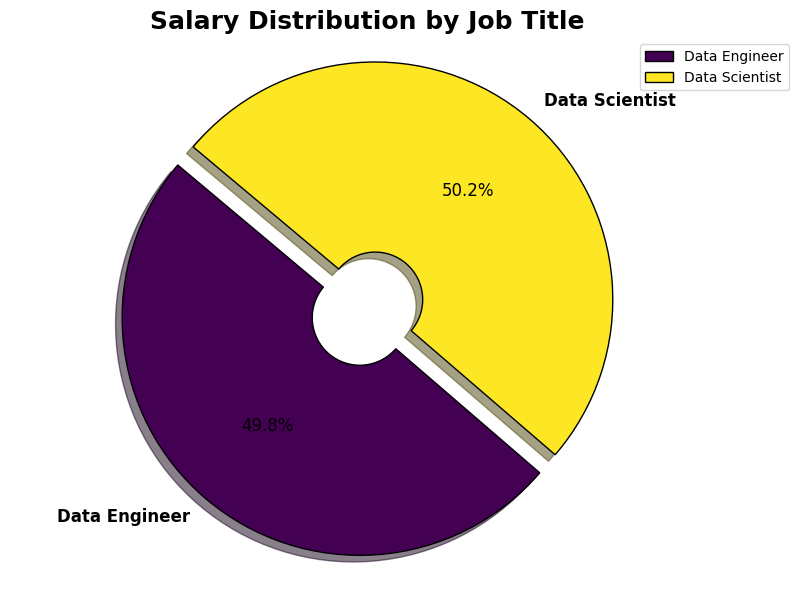

In [467]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = temp_df["job_title"]
sizes = temp_df["salary_in_usd"]

# Custom colors with gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Explode multiple slices
explode = [0.1 if value > np.mean(sizes) else 0 for value in sizes]

# Plot
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                    shadow=True, startangle=140, colors=colors, wedgeprops=dict(width=0.8, edgecolor='k'))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Salary Distribution by Job Title', fontsize=18, fontweight='bold')

# Customizing text properties
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(12)

# Add legend
plt.legend(loc='upper right', labels=labels, fontsize=10, bbox_to_anchor=(1.1, 1))

# Change background color
plt.gca().set_facecolor('#f7f7f7')

# Show plot
plt.tight_layout()
plt.show()


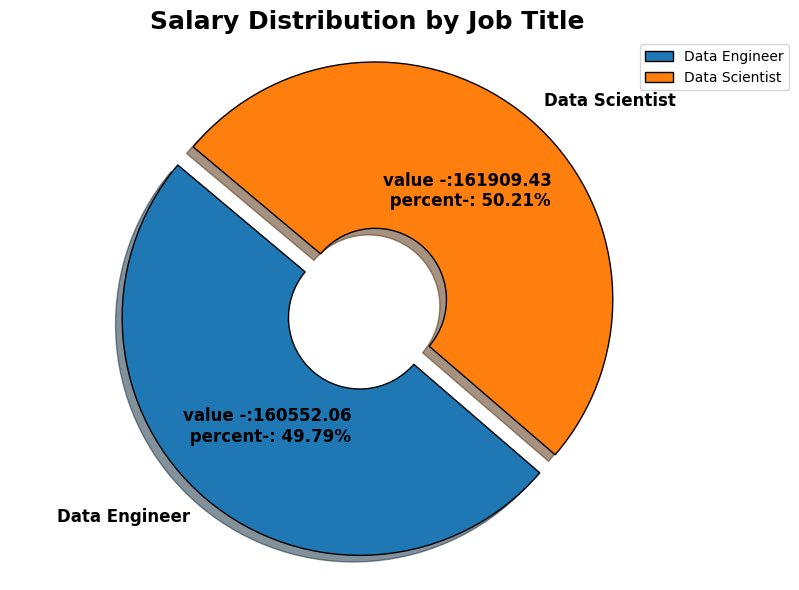

In [468]:
import matplotlib.pyplot as plt

def value_per(x):
    num = x / 100 * temp_df["salary_in_usd"].sum()
    return f"value -:{round(num, 2)}\n percent-: {round(x, 2)}%"

# Explode multiple slices
explode = [0.1 if value > np.mean(sizes) else 0 for value in sizes]

plt.figure(figsize=(8, 6))
plt.pie(temp_df["salary_in_usd"],explode=explode, labels=temp_df["job_title"], autopct=value_per, shadow=True, startangle=140, wedgeprops=dict(width=0.7, edgecolor='k'))

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Salary Distribution by Job Title', fontsize=18, fontweight='bold')

# Customizing text properties
for text in plt.gca().texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Add legend
plt.legend(loc='upper right', labels=temp_df["job_title"], fontsize=10, bbox_to_anchor=(1.1, 1))

# Change background color
plt.gca().set_facecolor('#f7f7f7')

# Show plot
plt.tight_layout()
plt.show()


## Question 4.salary distribution wrt company size

In [469]:
df

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title,is_india
0,2023,EN,FT,50000,USD,50000,DE,0,DE,M,Data Analyst,OTH
1,2024,SE,FT,200400,USD,200400,US,0,US,M,Data Management Specialist,OTH
2,2024,SE,FT,116500,USD,116500,US,0,US,M,Data Management Specialist,OTH
3,2024,SE,FT,188500,USD,188500,US,0,US,M,Data Scientist,OTH
4,2024,SE,FT,165100,USD,165100,US,0,US,M,Data Scientist,OTH
...,...,...,...,...,...,...,...,...,...,...,...,...
11565,2020,SE,FT,412000,USD,412000,US,100,US,L,Data Scientist,OTH
11566,2021,MI,FT,151000,USD,151000,US,100,US,L,Data Scientist,OTH
11567,2020,EN,FT,105000,USD,105000,US,100,US,S,Data Scientist,OTH
11568,2020,EN,CT,100000,USD,100000,US,100,US,L,Data Analyst,OTH


In [470]:
df["company_size"].unique()


array(['M', 'L', 'S'], dtype=object)

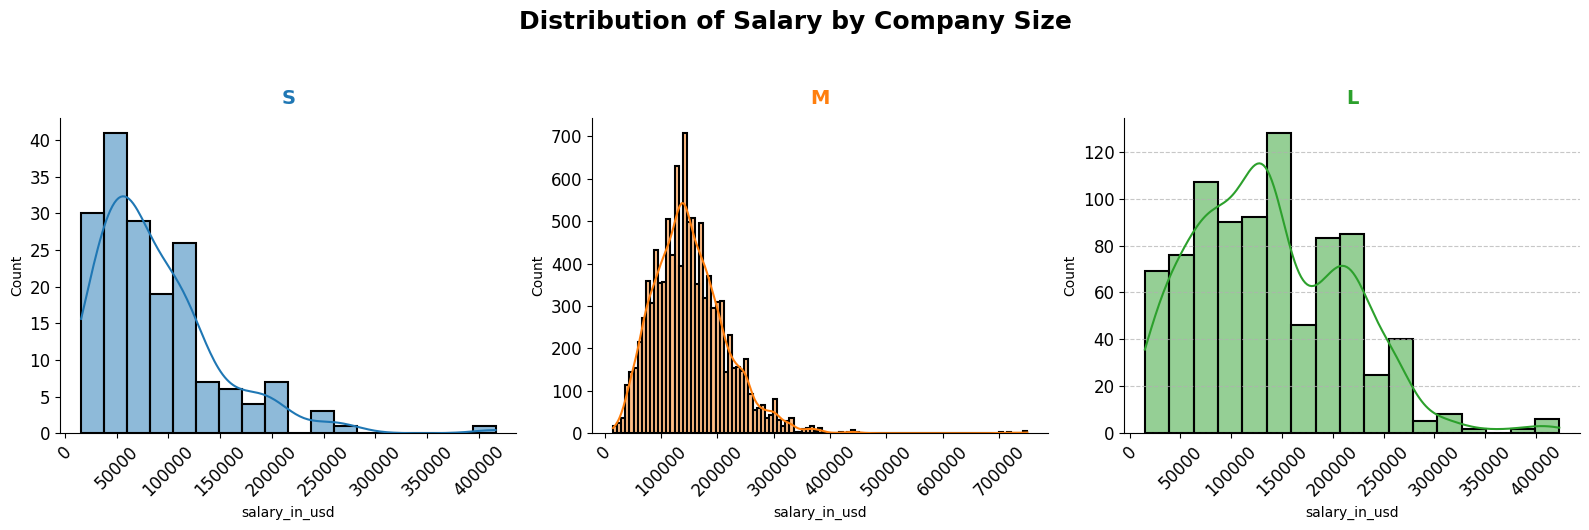

In [490]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Create subplots with specified size and style
fig, axs = plt.subplots(1, 3, figsize=(16, 5), facecolor='white')

# Plot histograms for different company sizes with enhanced styling
for i, size in enumerate(["S", "M", "L"]):
    sns.histplot(df[df["company_size"] == size]["salary_in_usd"], ax=axs[i], kde=True, color=colors[i], linewidth=1.5)
    axs[i].set_title(size.capitalize(), fontsize=14, fontweight='bold', pad=10, color=colors[i])  # Enhance title style
    axs[i].tick_params(axis='both', which='major', labelsize=12)  # Set tick label size
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-tick labels by 45 degrees

# Overall title and layout adjustments
plt.suptitle("Distribution of Salary by Company Size", fontsize=18, fontweight='bold', y=1.05, color='black')
plt.tight_layout()

# Remove excess spines and grid
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

# Add horizontal grid lines for better readability
plt.gca().yaxis.grid(True, linestyle='--', alpha=0.7)

# Add a descriptive label to the x-axis

# Show plot
plt.show()


## Question 5. average salary of da, ds, de based on employment type

In [472]:
temp = df[(df["job_title"] == "Data Scientist") | (df["job_title"] == "Data Engineer") | (df["job_title"] == "Data Analyst") ]

temp_df = temp.groupby(["job_title","employment_type"])["salary_in_usd"].mean().reset_index()
temp_df

,job_title,employment_type,salary_in_usd
0,Data Analyst,CT,105265.428571
1,Data Analyst,FL,43000.000000
2,Data Analyst,FT,114019.013211
3,Data Analyst,PT,51820.000000
4,Data Engineer,CT,105296.500000
5,Data Engineer,FL,56666.666667
6,Data Engineer,FT,160773.609047
7,Data Engineer,PT,46080.000000
8,Data Scientist,CT,141836.200000
9,Data Scientist,FL,53587.166667


C:\Users\pc\AppData\Local\Temp\ipykernel_17140\1593838544.py:9: UserWarning:


The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.



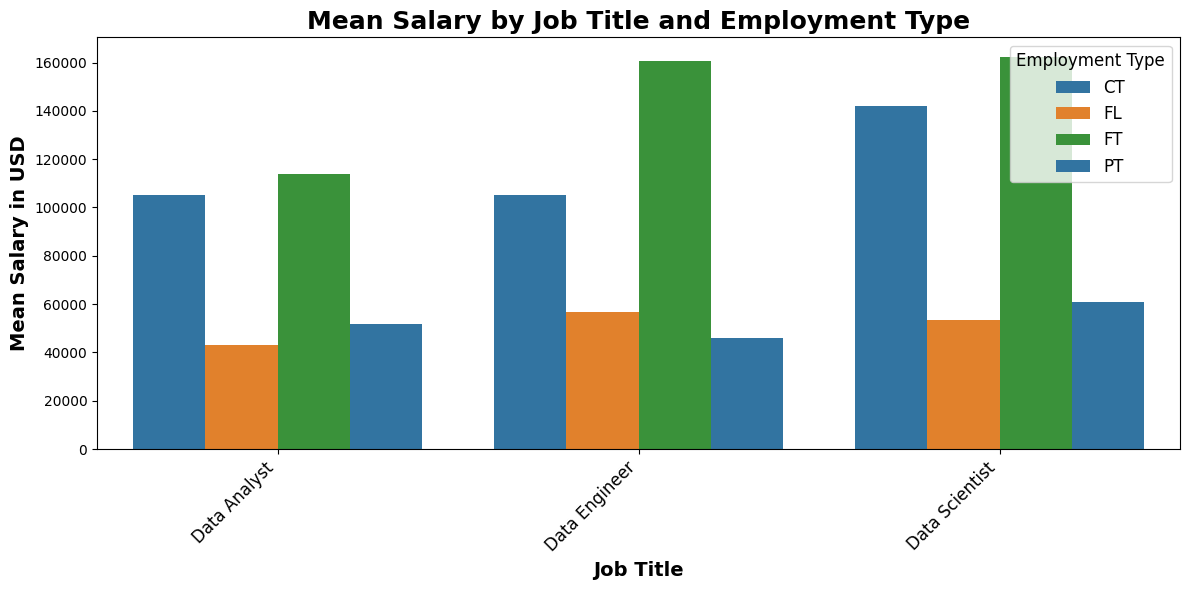

In [473]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Create bar plot with enhanced styling
plt.figure(figsize=(12, 6))
sns.barplot(data=temp_df, x="job_title", y="salary_in_usd", hue="employment_type", estimator="mean", palette=colors)

# Add title and labels with enhanced styling
plt.title("Mean Salary by Job Title and Employment Type", fontsize=18, fontweight='bold', color='black')
plt.xlabel("Job Title", fontsize=14, fontweight='bold')
plt.ylabel("Mean Salary in USD", fontsize=14, fontweight='bold')

# Customize legend
plt.legend(title="Employment Type", fontsize=12, title_fontsize=12, loc='upper right')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)


# Show plot
plt.tight_layout()
plt.show()


## Question no 6. top 5 countries on the basis of average salary for indian employees.

In [474]:
df

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title,is_india
0,2023,EN,FT,50000,USD,50000,DE,0,DE,M,Data Analyst,OTH
1,2024,SE,FT,200400,USD,200400,US,0,US,M,Data Management Specialist,OTH
2,2024,SE,FT,116500,USD,116500,US,0,US,M,Data Management Specialist,OTH
3,2024,SE,FT,188500,USD,188500,US,0,US,M,Data Scientist,OTH
4,2024,SE,FT,165100,USD,165100,US,0,US,M,Data Scientist,OTH
...,...,...,...,...,...,...,...,...,...,...,...,...
11565,2020,SE,FT,412000,USD,412000,US,100,US,L,Data Scientist,OTH
11566,2021,MI,FT,151000,USD,151000,US,100,US,L,Data Scientist,OTH
11567,2020,EN,FT,105000,USD,105000,US,100,US,S,Data Scientist,OTH
11568,2020,EN,CT,100000,USD,100000,US,100,US,L,Data Analyst,OTH


In [475]:
temp = df[df["employee_residence"]=="IN"]

In [476]:
temp_df1 = temp.groupby(["company_location"])["salary_in_usd"].agg('mean').sort_values(ascending=False).head().reset_index()
temp_df1

,company_location,salary_in_usd
0,US,90841.285714
1,AU,70000.000000
2,DE,59411.500000
3,ID,53416.000000
4,IN,42356.410714


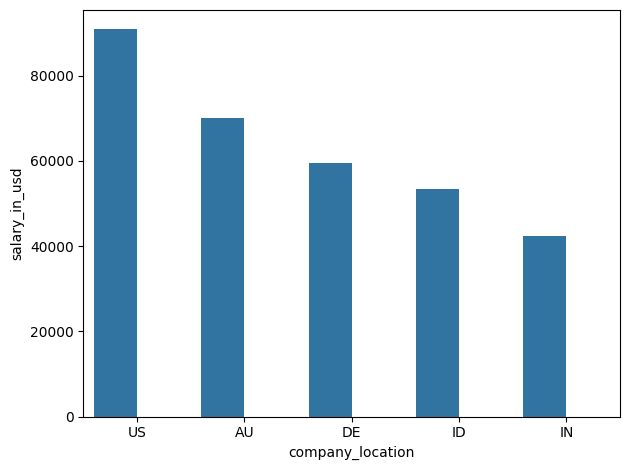

In [477]:
sns.barplot(data = temp_df1, x = "company_location", y = "salary_in_usd")

# Adjust bar width for better visual appeal
for patch in plt.gca().patches:
    patch.set_width(0.4)

# Show plot
plt.tight_layout()
plt.show()


## Question7. average salary of da, ds, de based on experiance level

In [478]:
temp = df[(df["job_title"] == "Data Scientist") | (df["job_title"] == "Data Engineer") | (df["job_title"] == "Data Analyst") ]


In [479]:
temp_df1 = temp.groupby(["experience_level","job_title"])["salary_in_usd"].agg('mean').sort_values(ascending=False).reset_index()
temp_df1

,experience_level,job_title,salary_in_usd
0,EX,Data Scientist,206314.400000
1,EX,Data Engineer,191256.543478
2,SE,Data Scientist,173031.981224
3,SE,Data Engineer,171071.535215
4,EX,Data Analyst,142867.647059
5,MI,Data Scientist,133278.362924
6,MI,Data Engineer,129843.722672
7,SE,Data Analyst,127663.360600
8,MI,Data Analyst,100297.424925
9,EN,Data Scientist,96631.224490


<Axes: xlabel='job_title', ylabel='salary_in_usd'>

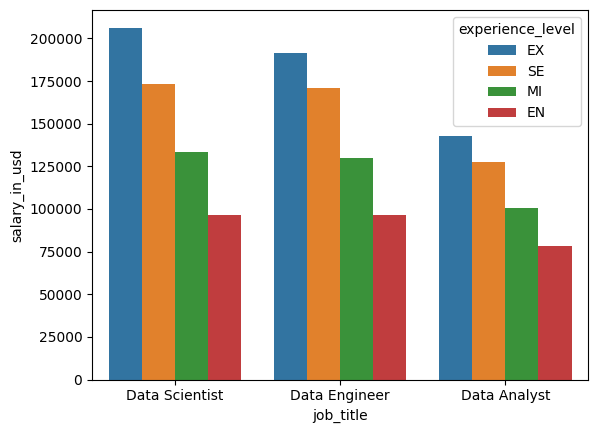

In [480]:
sns.barplot(data = temp_df1, x = "job_title", y = "salary_in_usd",
            hue = "experience_level", estimator = "mean", )

## Question 8. year wise comparision number of employees on remote job

In [481]:
temp = df[df["remote_ratio"] == 100]
temp

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title,is_india
9,2024,SE,FT,133650,USD,133650,US,100,US,M,Data Analyst,OTH
10,2024,SE,FT,68150,USD,68150,US,100,US,M,Data Analyst,OTH
15,2024,MI,FT,144200,USD,144200,US,100,US,M,Data Scientist,OTH
16,2024,MI,FT,72100,USD,72100,US,100,US,M,Data Scientist,OTH
51,2024,MI,FT,94625,USD,94625,US,100,US,M,Data Analyst,OTH
...,...,...,...,...,...,...,...,...,...,...,...,...
11564,2021,SE,FT,165000,USD,165000,US,100,US,L,Data Specialist,OTH
11565,2020,SE,FT,412000,USD,412000,US,100,US,L,Data Scientist,OTH
11566,2021,MI,FT,151000,USD,151000,US,100,US,L,Data Scientist,OTH
11567,2020,EN,FT,105000,USD,105000,US,100,US,S,Data Scientist,OTH


In [482]:
temp_df = df.groupby(by =["work_year","remote_ratio"])["job_title"].count().reset_index()


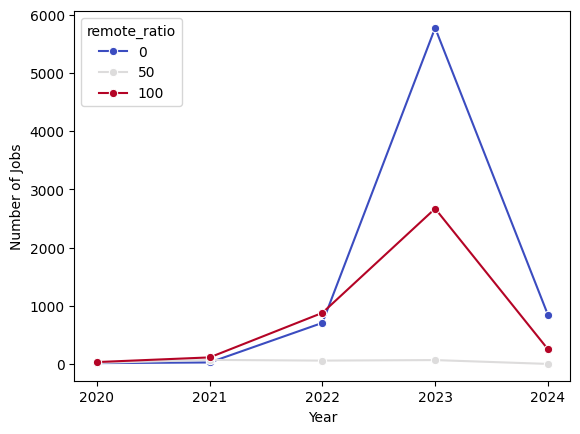

In [483]:
sns.lineplot(data = temp_df, x = "work_year", y = "job_title",
             hue = "remote_ratio", marker = "o", palette = "coolwarm")
plt.xticks(temp_df["work_year"].unique())
plt.ylabel("Number of Jobs")
plt.xlabel("Year")
plt.show()

## Question 9  year on year growth for da, ds,de

In [484]:
temp_df2 =df[(df["job_title"] == "Data Scientist") | (df["job_title"] == "Data Engineer") | (df["job_title"] == "Data Analyst")]
temp_df2

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title,is_india
0,2023,EN,FT,50000,USD,50000,DE,0,DE,M,Data Analyst,OTH
3,2024,SE,FT,188500,USD,188500,US,0,US,M,Data Scientist,OTH
4,2024,SE,FT,165100,USD,165100,US,0,US,M,Data Scientist,OTH
7,2024,MI,FT,128600,USD,128600,US,0,US,M,Data Engineer,OTH
8,2024,MI,FT,100000,USD,100000,US,0,US,M,Data Engineer,OTH
...,...,...,...,...,...,...,...,...,...,...,...,...
11565,2020,SE,FT,412000,USD,412000,US,100,US,L,Data Scientist,OTH
11566,2021,MI,FT,151000,USD,151000,US,100,US,L,Data Scientist,OTH
11567,2020,EN,FT,105000,USD,105000,US,100,US,S,Data Scientist,OTH
11568,2020,EN,CT,100000,USD,100000,US,100,US,L,Data Analyst,OTH


In [485]:
temp_df1 = temp_df2.groupby(["work_year"])["salary_in_usd"].agg('mean').sort_values(ascending=False).reset_index()
temp_df1

,work_year,salary_in_usd
0,2024,155547.479401
1,2023,154799.425137
2,2022,134709.795943
3,2020,102250.866667
4,2021,98613.230047


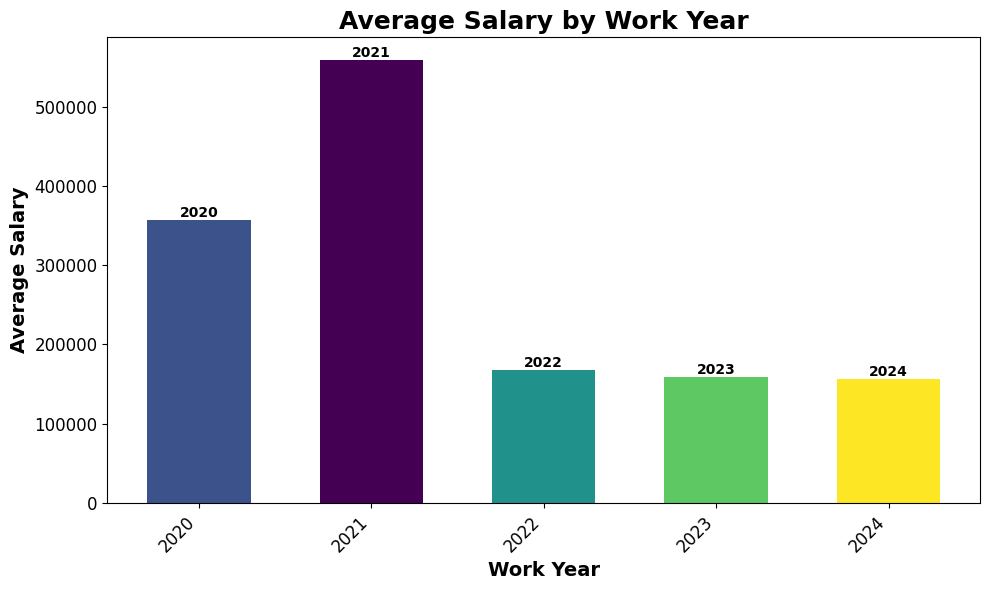

In [486]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a dataframe 'df' containing 'work_year' and 'salary' columns

# Create a temporary dataframe to group data by work year and calculate average salary
temp_df1 = df.groupby('work_year')['salary'].mean()

# Sort the results by salary in descending order
temp_df1 = temp_df1.sort_values(ascending=False)

# Now you have temp_df1 with average salary for every work year

# Set color gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(temp_df1)))

# To create a bar graph (requires matplotlib)
plt.figure(figsize=(10, 6))  # Set figure size
bars = plt.bar(temp_df1.index, temp_df1.values, color=colors, width=0.6)  # Adjust bar width

# Add data labels outside the bars
for bar, year in zip(bars, temp_df1.index):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
             str(year), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.xlabel('Work Year', fontsize=14, fontweight='bold')  # Add label for x-axis
plt.ylabel('Average Salary', fontsize=14, fontweight='bold')  # Add label for y-axis
plt.title('Average Salary by Work Year', fontsize=18, fontweight='bold')  # Add title
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-tick labels for better readability
plt.yticks(fontsize=12)  # Set y-tick label font size
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


## Question 10 10. average salary of da,ds,de based on company size

In [487]:
temp_df2 =df[(df["job_title"] == "Data Scientist") | (df["job_title"] == "Data Engineer") | (df["job_title"] == "Data Analyst")]
temp_df2

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title,is_india
0,2023,EN,FT,50000,USD,50000,DE,0,DE,M,Data Analyst,OTH
3,2024,SE,FT,188500,USD,188500,US,0,US,M,Data Scientist,OTH
4,2024,SE,FT,165100,USD,165100,US,0,US,M,Data Scientist,OTH
7,2024,MI,FT,128600,USD,128600,US,0,US,M,Data Engineer,OTH
8,2024,MI,FT,100000,USD,100000,US,0,US,M,Data Engineer,OTH
...,...,...,...,...,...,...,...,...,...,...,...,...
11565,2020,SE,FT,412000,USD,412000,US,100,US,L,Data Scientist,OTH
11566,2021,MI,FT,151000,USD,151000,US,100,US,L,Data Scientist,OTH
11567,2020,EN,FT,105000,USD,105000,US,100,US,S,Data Scientist,OTH
11568,2020,EN,CT,100000,USD,100000,US,100,US,L,Data Analyst,OTH


In [488]:
temp_df1 = temp_df2.groupby(["company_size","job_title"])["salary_in_usd"].agg('mean').sort_values(ascending=False).reset_index()
temp_df1

,company_size,job_title,salary_in_usd
0,M,Data Scientist,164745.876555
1,M,Data Engineer,163323.560833
2,L,Data Scientist,153895.927602
3,L,Data Engineer,131275.110368
4,M,Data Analyst,115500.578059
5,S,Data Scientist,93860.109756
6,L,Data Analyst,89407.481481
7,S,Data Engineer,88666.553571
8,S,Data Analyst,73796.323529


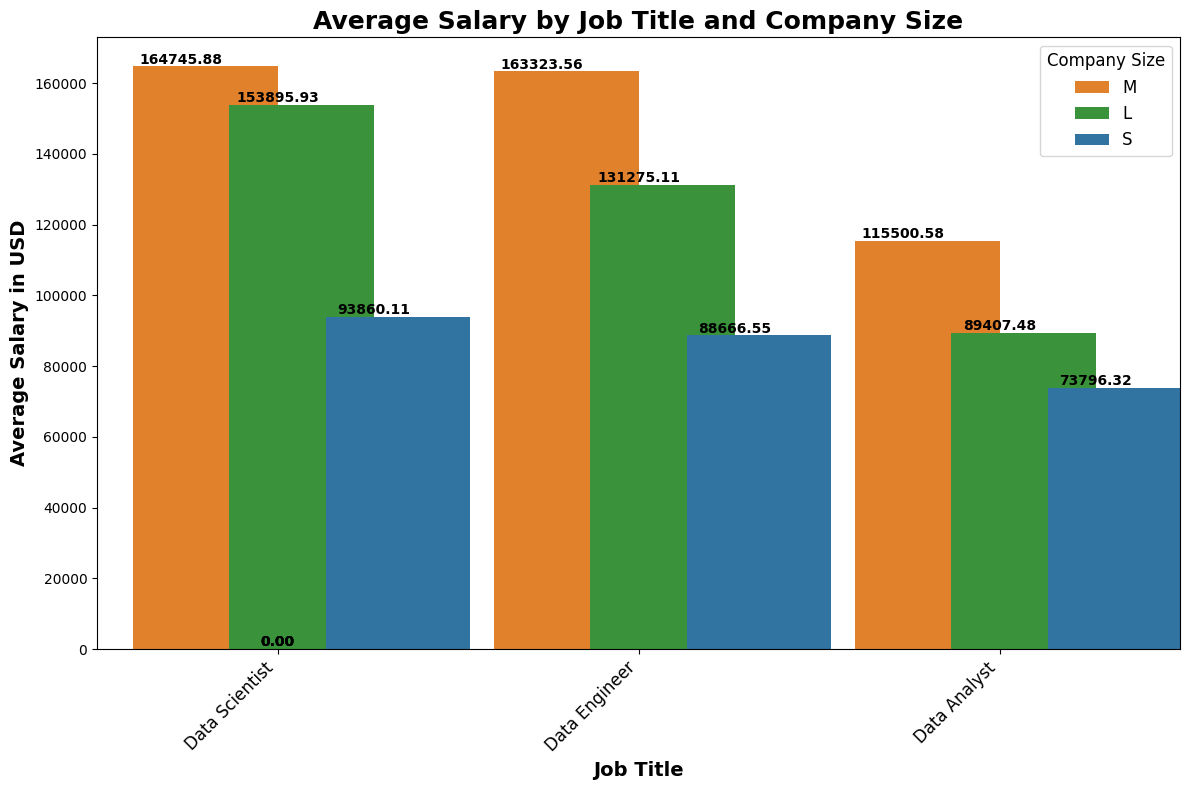

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set custom color palette for each level of company_size
palette = {"S": "tab:blue", "M": "tab:orange", "L": "tab:green"}

# Create bar plot with enhanced styling
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=temp_df1, x="job_title", y="salary_in_usd", hue="company_size", palette=palette)

# Add value annotations on top of each bar
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, fontweight='bold', color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title and labels with enhanced styling
plt.title("Average Salary by Job Title and Company Size", fontsize=18, fontweight='bold')
plt.xlabel("Job Title", fontsize=14, fontweight='bold')
plt.ylabel("Average Salary in USD", fontsize=14, fontweight='bold')

# Customize legend
plt.legend(title="Company Size", fontsize=12, title_fontsize=12)

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)


# Adjust bar width for better visual appeal
for patch in ax.patches:
    patch.set_width(0.4)

# Show plot
plt.tight_layout()
plt.show()
